## SETUP
- imported pandas to read csv
- imports from sckit library: 
- train_test_split to divide our data into train and test
- OneHotEncoder 
- Standard Scalar to scale our data 
- confusion matrix 
- Logistic Regression, GaussianNB and SVC for ML model
- imported sns and plt for creating plots 


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import numpy as np
from sklearn.preprocessing import FunctionTransformer





## DATA INGESTION

In [25]:
df = pd.read_csv(r'data\clean\clean_credit_default.csv')

## 1st MODEL: LOGISTIC REGRESSION 

- One hot encoding to change strings in data to numeric format
- Fitting the data on x
- divided data for training and testing
- Performed feature scaling to normalize the range
- fit train and test data to logistic regression model
- predicting on test set
- Checking accuracy
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

Accuracy: 0.8050666666666667
Precision: 0.6843501326259946
Recall: 0.16114928169893816
F1 Score: 0.2608695652173913
Kappa Score: 0.19539742377482106


Text(0.5, 1.0, 'confusion matrix')

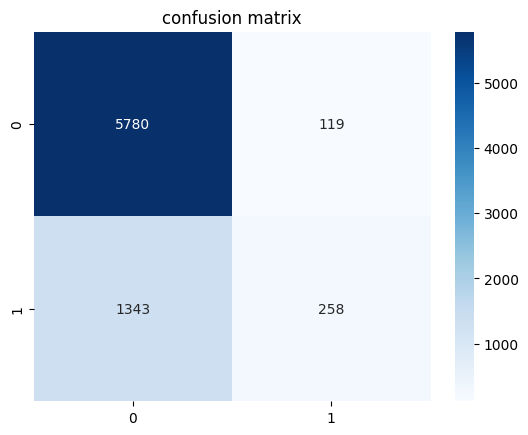

In [26]:
x1 = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_mean', 'BILL_APR', 'BILL_MAY', 'BILL_JUN', 'BILL_JUL', 'BILL_JUL', 'BILL_AUG', 'BILL_SEPT', 'PAID_APR', 'PAID_MAY', 'PAID_JUN', 'PAID_JUL', 'PAID_AUG', 'PAID_SEPT']]
y1 = df['default.payment.next.month']

column_transformer1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

x1 = column_transformer1.fit_transform(x1)

x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size= 0.25, random_state=50) 

st_x1= StandardScaler()    
x1_train= st_x1.fit_transform(x1_train)    
x1_test= st_x1.transform(x1_test)  

logreg1 = LogisticRegression()
logreg1.fit(x1_train, y1_train)

y1_pred= logreg1.predict(x1_test)  

accuracy = logreg1.score(x1_test, y1_test)
print('Accuracy:', accuracy)

precision = precision_score(y1_test, y1_pred)
print("Precision:", precision)

recall = recall_score(y1_test, y1_pred)
print("Recall:", recall)

f1= f1_score(y1_test, y1_pred)
print("F1 Score:", f1)

kappa = cohen_kappa_score(y1_test, y1_pred)
print("Kappa Score:", kappa)

cm= confusion_matrix(y1_test, y1_pred) 

sns.heatmap(cm, annot=True, cmap = 'Blues', fmt='g')
plt.title("confusion matrix")



## 2nd MODEL: LOGISTIC REGRESSION 

- removing variables we found to be not as important during EDA and checking
- One hot encoding the data
- Fitting the one hot encoded data on x
- divided data for training and testing
- Performed feature scaling on the data to normalize the range 
- fit train and test data to logistic regression model
- predicting on test set
- Checking Accuracy
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix


Accuracy: 0.8065333333333333
Precision: 0.7130681818181818
Recall: 0.15677701436602123
F1 Score: 0.2570404505888377
Kappa Score: 0.19510493627553505


Text(0.5, 1.0, 'Confusion matrix for new dataset')

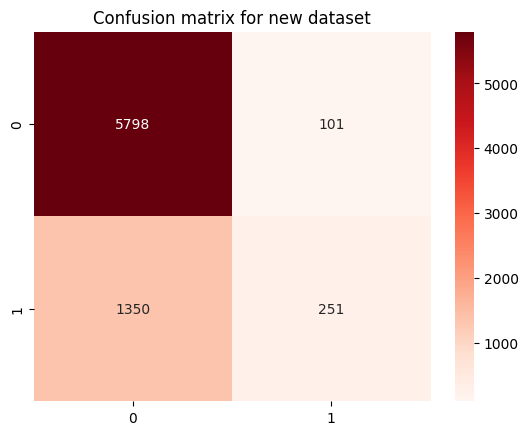

In [27]:
x2 = df[['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sum']]
y2 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

x2 = column_transformer2.fit_transform(x2)

x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.25, random_state=50) 

st_x1= StandardScaler()    
x2_train= st_x1.fit_transform(x2_train)    
x2_test= st_x1.transform(x2_test)

logreg1 = LogisticRegression()
logreg1.fit(x2_train, y2_train)

y2_pred = logreg1.predict(x2_test)  

accuracy = logreg1.score(x2_test, y2_test)
print('Accuracy:', accuracy)

precision = precision_score(y2_test, y2_pred)
print("Precision:", precision)

recall = recall_score(y2_test, y2_pred)
print("Recall:", recall)

f1 = f1_score(y2_test, y2_pred)
print("F1 Score:", f1)

kappa = cohen_kappa_score(y2_test, y2_pred)
print("Kappa Score:", kappa)

cm2 = confusion_matrix(y2_test, y2_pred)

sns.heatmap(cm2, annot=True, cmap='Reds', fmt='g')
plt.title("Confusion matrix for new dataset")

## 3rd MODEL: NAIVE BAYES CLASSIFIER

- One hot encoding the data
- Fitting the one hot encoded data on x
- divided data for training and testing
- Performed feature scaling on the data to normalize the range
- Fit train and test data to naive bayes classification model
- Predicting on test set
- Checking accuracy 
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

Accuracy 0.7992
Precision: 0.5826086956521739
Recall: 0.20924422236102436
F1 Score: 0.3079044117647059
Kappa Score: 0.2198966078107032


Text(0.5, 1.0, 'Confusion Matric for naive bayes')

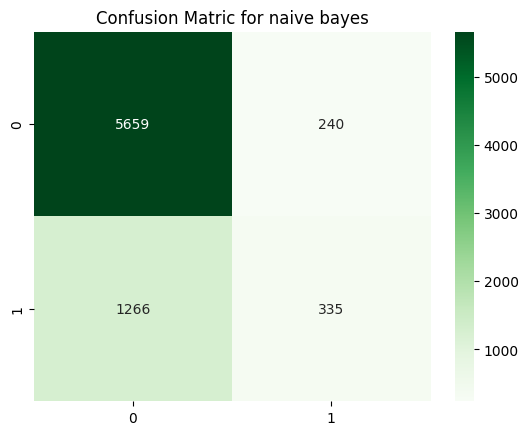

In [28]:
x2 = df[['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sum']]
y2 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

x2 = column_transformer2.fit_transform(x2)

x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.25, random_state=50) 

st_x1= StandardScaler()    
x2_train= st_x1.fit_transform(x2_train)    
x2_test= st_x1.transform(x2_test)

nbclass = GaussianNB()  
nbclass.fit(x2_train, y2_train)

y3_pred = nbclass.predict(x2_test)

accuracy = nbclass.score(x2_test, y2_test)
print("Accuracy", accuracy)

precision = precision_score(y2_test, y3_pred)
print("Precision:", precision)

recall = recall_score(y2_test, y3_pred)
print("Recall:", recall)

f1= f1_score(y2_test, y3_pred)
print("F1 Score:", f1)

kappa = cohen_kappa_score(y2_test, y3_pred)
print("Kappa Score:", kappa)

cm3 = confusion_matrix(y2_test, y3_pred)

sns.heatmap(cm3, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matric for naive bayes")

## 4th MODEL: SVM (support vector machine)

### svm1
- One hot encoding the data
- Fitting the one hot encoded data on x
- divided data for training and testing
- Performed feature scaling on the data to normalize the range
- Fit train and test data to SVM model
- Predicting on test set
- Checking accuracy 
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

Accuracy:  0.7865333333333333
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Kappa Score: 0.0


d:\source\repos\OrionDataAnalyticsInternshipJul23\Orion.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion matrix for SVM')

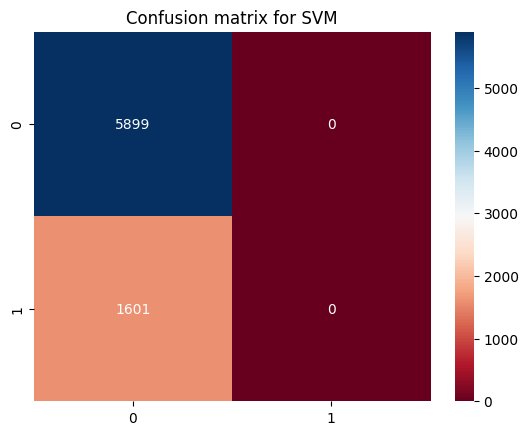

In [29]:
x2 = df[['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sum']]
y2 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

x2 = column_transformer2.fit_transform(x2)

x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.25, random_state=50) 

st_x1= StandardScaler()    
x2_train= st_x1.fit_transform(x2_train)    
x2_test= st_x1.transform(x2_test)

svm = SVC(kernel='linear', random_state=50)  
svm.fit(x2_train, y2_train) 

y4_pred = svm.predict(x2_test)

accuracy = svm.score(x2_test, y2_test)
print("Accuracy: ",accuracy)

precision = precision_score(y2_test, y4_pred)
print("Precision:", precision)

recall = recall_score(y2_test, y4_pred)
print("Recall:", recall)

f1= f1_score(y2_test, y4_pred)
print("F1 Score:", f1)

kappa = cohen_kappa_score(y2_test, y4_pred)
print("Kappa Score:", kappa)

cm4 = confusion_matrix(y2_test, y4_pred)

sns.heatmap(cm4, annot=True, cmap='RdBu', fmt='g')
plt.title("Confusion matrix for SVM")

### svm2
- Removing skewedness from data 

In [30]:
x1 = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_mean', 'BILL_APR', 'BILL_MAY', 'BILL_JUN', 'BILL_JUL', 'BILL_JUL', 'BILL_AUG', 'BILL_SEPT', 'PAID_APR', 'PAID_MAY', 'PAID_JUN', 'PAID_JUL', 'PAID_AUG', 'PAID_SEPT']]
y1 = df['default.payment.next.month']

cols_to_transform = ['BILL_APR', 'BILL_MAY', 'BILL_JUN', 'BILL_JUL', 'BILL_AUG', 'BILL_SEPT', 'PAID_APR', 'PAID_MAY', 'PAID_JUN', 'PAID_JUL', 'PAID_AUG', 'PAID_SEPT']
for cols in cols_to_transform:
    x1[cols]=np.log1p(x1[cols])

column_transformer1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

x1 = column_transformer1.fit_transform(x1)

x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size= 0.25, random_state=50) 

st_x1= StandardScaler()    
x1_train= st_x1.fit_transform(x1_train)    
x1_test= st_x1.transform(x1_test)  

svm = SVC(kernel='linear', random_state=50)  
svm.fit(x1_train, y1_train)

y1_pred= svm.predict(x1_test)  

accuracy = svm.score(x1_test, y1_test)
print('Accuracy:', accuracy)

precision = precision_score(y1_test, y1_pred)
print("Precision:", precision)

recall = recall_score(y1_test, y1_pred)
print("Recall:", recall)

f1= f1_score(y1_test, y1_pred)
print("F1 Score:", f1)

kappa = cohen_kappa_score(y1_test, y1_pred)
print("Kappa Score:", kappa)

cm= confusion_matrix(y1_test, y1_pred) 

sns.heatmap(cm, annot=True, cmap = 'Blues', fmt='g')
plt.title("confusion matrix")


d:\source\repos\OrionDataAnalyticsInternshipJul23\Orion.venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\source\repos\OrionDataAnalyticsInternshipJul23\Orion.venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\anshi\AppData\Local\Temp\ipykernel_13964\1637762662.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[cols]=np.log1p(x1[cols])
d:\source\repos\OrionDataAnalyticsInternshipJul23\Orion.venv\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log1p
  result = func(self

ValueError: Input X contains infinity or a value too large for dtype('float64').

## 5th MODEL: LOGISTIC REGRESSION 

- removing variables we found to be not as important during EDA and checking
- divided data for training and testing
- Performed feature scaling on the data to normalize the range 
- fit train and test data to logistic regression model
- predicting on test set
- Checking Accuracy
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix


Accuracy: 0.8261333333333334
Accuracy_score: 0.46773333333333333
Precision: 0.6931079323797139
Recall: 0.3329169269206746
F1 Score: 0.449789029535865
Kappa Score: 0.3613128794980258


Text(0.5, 1.0, 'Confusion matrix for new dataset')

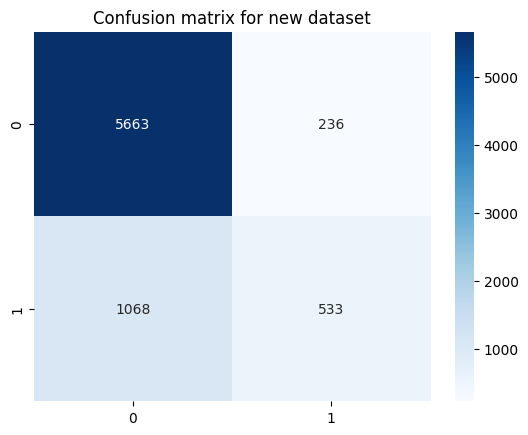

In [ ]:
x5 = df[['REPAY_SEPT']]
y5 = df['default.payment.next.month']

x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size= 0.25, random_state=50) 

logreg1 = LogisticRegression(random_state=50)
logreg1.fit(x5_train, y5_train)


y5_pred = logreg1.predict(x5_test)  

accuracy = logreg1.score(x5_test, y5_test)
print('Accuracy:', accuracy)

accuracy = accuracy_score(x5_test, y5_test)
print('Accuracy_score:', accuracy)

precision = precision_score(y5_test, y5_pred)
print("Precision:", precision)

recall = recall_score(y5_test, y5_pred)
print("Recall:", recall)

f1= f1_score(y5_test, y5_pred)
print("F1 Score:", f1)

kappa = cohen_kappa_score(y5_test, y5_pred)
print("Kappa Score:", kappa)

cm5 = confusion_matrix(y5_test, y5_pred)

sns.heatmap(cm5, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion matrix for new dataset")

Accuracy: 0.8261333333333334
Precision: 0.6931079323797139
Recall: 0.3329169269206746
F1 Score: 0.449789029535865
Kappa Score: 0.3613128794980258


Text(0.5, 1.0, 'Confusion matrix for new dataset')

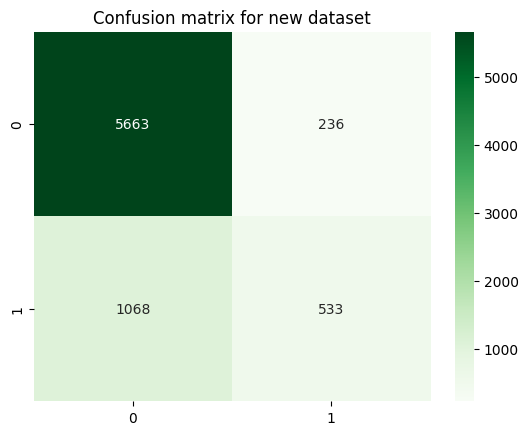

In [ ]:
x5 = df[['REPAY_SEPT','SEX']]
y5 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX'])],remainder='passthrough')
x5 = column_transformer2.fit_transform(x5)

x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size= 0.25, random_state=50) 

logreg1 = LogisticRegression(random_state=50)
logreg1.fit(x5_train, y5_train)


y5_pred = logreg1.predict(x5_test)  

accuracy = logreg1.score(x5_test, y5_test)
print('Accuracy:', accuracy)

#accuracy = accuracy_score(x5_test, y5_test)
#print('Accuracy_score:', accuracy)

precision = precision_score(y5_test, y5_pred)
print("Precision:", precision)

recall = recall_score(y5_test, y5_pred)
print("Recall:", recall)

f1= f1_score(y5_test, y5_pred)
print("F1 Score:", f1)

kappa = cohen_kappa_score(y5_test, y5_pred)
print("Kappa Score:", kappa)

cm5 = confusion_matrix(y5_test, y5_pred)

sns.heatmap(cm5, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion matrix for new dataset")

Accuracy: 0.8261333333333334
Precision: 0.6931079323797139
Recall: 0.3329169269206746
F1 Score: 0.449789029535865
Kappa Score: 0.3613128794980258


Text(0.5, 1.0, 'Confusion matrix for new dataset')

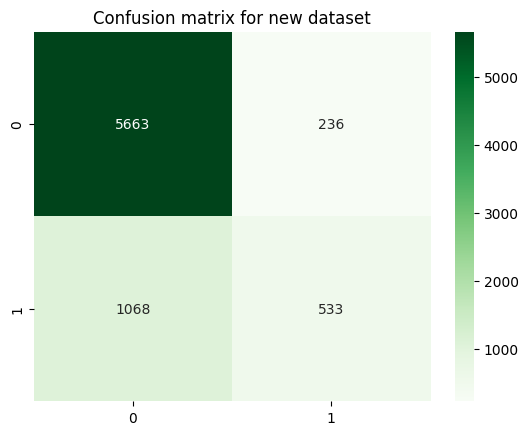

In [ ]:
x5 = df[['REPAY_SEPT','MARRIAGE']]
y5 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['MARRIAGE'])],remainder='passthrough')
x5 = column_transformer2.fit_transform(x5)

x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size= 0.25, random_state=50) 

logreg1 = LogisticRegression(random_state=50)
logreg1.fit(x5_train, y5_train)


y5_pred = logreg1.predict(x5_test)  

accuracy = logreg1.score(x5_test, y5_test)
print('Accuracy:', accuracy)

#accuracy = accuracy_score(x5_test, y5_test)
#print('Accuracy_score:', accuracy)

precision = precision_score(y5_test, y5_pred)
print("Precision:", precision)

recall = recall_score(y5_test, y5_pred)
print("Recall:", recall)

f1= f1_score(y5_test, y5_pred)
print("F1 Score:", f1)

kappa = cohen_kappa_score(y5_test, y5_pred)
print("Kappa Score:", kappa)

cm5 = confusion_matrix(y5_test, y5_pred)

sns.heatmap(cm5, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion matrix for new dataset")

Accuracy: 0.8261333333333334
Precision: 0.6931079323797139
Recall: 0.3329169269206746
F1 Score: 0.449789029535865
Kappa Score: 0.3613128794980258


Text(0.5, 1.0, 'Confusion matrix for new dataset')

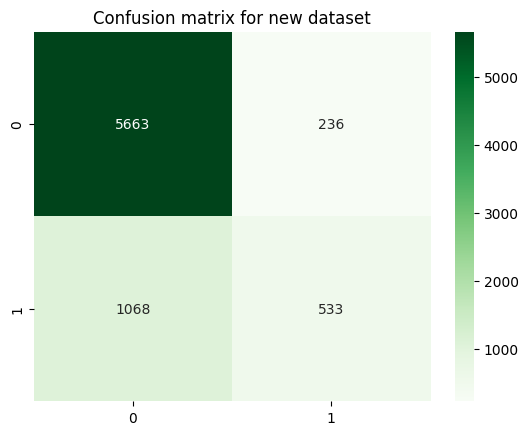

In [ ]:
x5 = df[['REPAY_SEPT','EDUCATION']]
y5 = df['default.payment.next.month']

x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size= 0.25, random_state=50) 

logreg1 = LogisticRegression(random_state=50)
logreg1.fit(x5_train, y5_train)


y5_pred = logreg1.predict(x5_test)  

accuracy = logreg1.score(x5_test, y5_test)
print('Accuracy:', accuracy)

#accuracy = accuracy_score(x5_test, y5_test)
#print('Accuracy_score:', accuracy)

precision = precision_score(y5_test, y5_pred)
print("Precision:", precision)

recall = recall_score(y5_test, y5_pred)
print("Recall:", recall)

f1= f1_score(y5_test, y5_pred)
print("F1 Score:", f1)

kappa = cohen_kappa_score(y5_test, y5_pred)
print("Kappa Score:", kappa)

cm5 = confusion_matrix(y5_test, y5_pred)

sns.heatmap(cm5, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion matrix for new dataset")

Accuracy: 0.826
Precision: 0.6932114882506527
Recall: 0.3316677076826983
F1 Score: 0.44866920152091255
Kappa Score: 0.3602844173846296


Text(0.5, 1.0, 'Confusion matrix for new dataset')

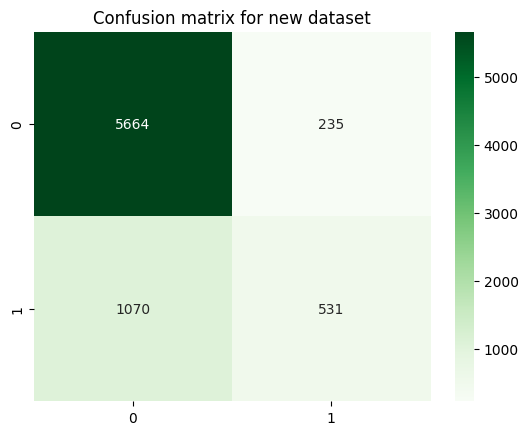

In [ ]:
x5 = df[['REPAY_SEPT','AGE']]
y5 = df['default.payment.next.month']

x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size= 0.25, random_state=50) 

logreg1 = LogisticRegression(random_state=50)
logreg1.fit(x5_train, y5_train)


y5_pred = logreg1.predict(x5_test)  

accuracy = logreg1.score(x5_test, y5_test)
print('Accuracy:', accuracy)

#accuracy = accuracy_score(x5_test, y5_test)
#print('Accuracy_score:', accuracy)

precision = precision_score(y5_test, y5_pred)
print("Precision:", precision)

recall = recall_score(y5_test, y5_pred)
print("Recall:", recall)

f1= f1_score(y5_test, y5_pred)
print("F1 Score:", f1)

kappa = cohen_kappa_score(y5_test, y5_pred)
print("Kappa Score:", kappa)

cm5 = confusion_matrix(y5_test, y5_pred)

sns.heatmap(cm5, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion matrix for new dataset")

## 6th MODEL: RANDOM FOREST

- One hot encoding the data
- Fitting the one hot encoded data on x
- divided data for training and testing
- Performed feature scaling on the data to normalize the range
- Fit train and test data to random forest model
- Predicting on test set
- Checking accuracy 
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

Accuracy: 0.8098666666666666
Precision: 0.6152832674571805
Recall: 0.29169269206745785
F1 Score: 0.39576271186440676
Kappa Score: 0.2995924866018821


Text(0.5, 1.0, 'Confusion matrix for new dataset')

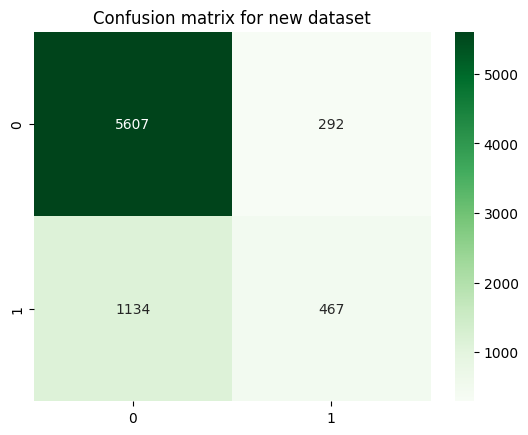

In [ ]:
x2 = df[['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sum']]
y2 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

x2 = column_transformer2.fit_transform(x2)

x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.25, random_state=50) 

st_x1= StandardScaler()    
x2_train= st_x1.fit_transform(x2_train)    
x2_test= st_x1.transform(x2_test)


rf_classifier = RandomForestClassifier(random_state=50)
rf_classifier.fit(x2_train, y2_train)

y6_pred = rf_classifier.predict(x2_test)

accuracy = accuracy_score(y2_test, y6_pred)
print('Accuracy:', accuracy)

precision = precision_score(y2_test, y6_pred)
print("Precision:", precision)

recall = recall_score(y2_test, y6_pred)
print("Recall:", recall)

f1= f1_score(y2_test, y6_pred)
print("F1 Score:", f1)

kappa = cohen_kappa_score(y2_test, y6_pred)
print("Kappa Score:", kappa)

cm6 = confusion_matrix(y2_test, y6_pred)

sns.heatmap(cm6, annot=True, cmap='Greens', fmt='g')

plt.title("Confusion matrix for new dataset")
